# Assessing histones as a model system

## Setup

In [75]:
import os
import matplotlib.pyplot as plt
from localcider.sequenceParameters import SequenceParameters
from Bio import SeqIO

## Sequence analysis using LocalCider

Documentation on parameters from the Pappu lab can be found here:
- [CIDER](http://pappulab.wustl.edu/CIDER/about/)
- [localCIDER](http://pappulab.github.io/localCIDER/)

In [106]:
# Loading data
data_dir = '../../data/histones'
histones = {}
for filename in os.listdir(data_dir):
    filepath = '/'.join([data_dir, filename])
    for record in SeqIO.parse(open(filepath, 'r'), 'fasta'):
        histones[record.id] = str(record.seq)

print("The following proteins are investigated:")
for id, seq in histones.items():
    print(f" - {id}")

The following proteins are investigated:
 - NP_003519.1


NP_003519.1
	kappa:	0.302
	FCR:	0.486
	NCPR:	0.371
	HDRP:	2.614
	FDP:	0.943



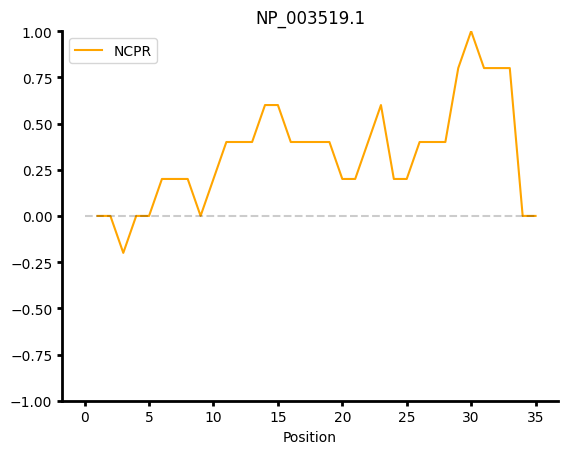

In [107]:
# Performing sequence analysis using localCIDER
for tag, seq in histones.items():

    # Dictionary for CIDER parameters
    params = {}

    # Creating a SequenceParameters object from sequence
    SeqOb = SequenceParameters(seq)

    # Carry out analysis
    params['kappa'] = SeqOb.get_kappa()
    params['FCR'] = SeqOb.get_FCR()
    params['NCPR'] = SeqOb.get_NCPR()
    params['HDRP'] = SeqOb.get_mean_hydropathy()
    params['FDP'] = SeqOb.get_fraction_disorder_promoting()

    # Print results
    print(tag)
    for p, v in params.items():
        print(f"\t{p}:\t{v:.3f}")
    print()

    # Plot position-wise 
    fig, ax = plt.subplots()
    ax.plot(*SeqOb.get_linear_NCPR(), label="NCPR", color='orange')
    ax.hlines(0,0,SeqOb.get_length(), ls='dashed', color='k', alpha=0.2)
    ax.set_ylim(-1,1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    linewidth = 2
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.xaxis.set_tick_params(width=linewidth)
    ax.yaxis.set_tick_params(width=linewidth)
    ax.set_title(tag)
    ax.set_xlabel("Position")
    ax.legend()

    